<a href="https://colab.research.google.com/github/Gaurav-Ramachandra/Sem6-ML_Lab/blob/main/ML%20Lab4%207-4-25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)


Mounted at /content/drive



Predicted House Price: $1,047,747.70


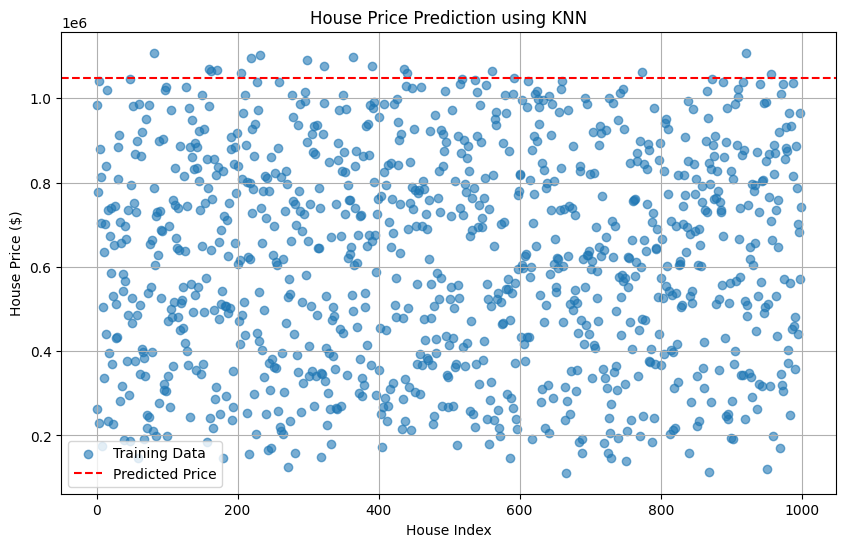

In [ ]:
# knn - House Price dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Sem-6/ML/Lab4/house_price_regression_dataset.csv')

# Normalize features
def normalize(df):
    return (df - df.min()) / (df.max() - df.min())

features = ['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built',
            'Lot_Size', 'Garage_Size', 'Neighborhood_Quality']
target = 'House_Price'

df_normalized = normalize(df[features])
df_normalized[target] = df[target]  # append target for reference

# KNN Regression with explicit Euclidean distance formula
def euclidean_distance(point1, point2):
    dist = 0
    for i in range(len(point1)):
        dist += (point1[i] - point2[i]) ** 2
    return np.sqrt(dist)

def knn_predict(X_train, y_train, x_input, k=3):
    distances = []
    for i in range(len(X_train)):
        # Explicit Euclidean distance
        dist = euclidean_distance(list(X_train.iloc[i]), x_input)
        distances.append((dist, y_train.iloc[i]))

    distances.sort(key=lambda x: x[0])
    nearest_neighbors = distances[:k]

    # Mean of K nearest neighbors
    predicted_value = np.mean([neighbor[1] for neighbor in nearest_neighbors])
    return predicted_value


new_input = {
    'Square_Footage': 25000,
    'Num_Bedrooms': 4,
    'Num_Bathrooms': 3,
    'Year_Built': 2015,
    'Lot_Size': 0.5,
    'Garage_Size': 2,
    'Neighborhood_Quality': 8
}

# Normalize new input
new_input_normalized = []
for feature in features:
    norm_value = (new_input[feature] - df[feature].min()) / (df[feature].max() - df[feature].min())
    new_input_normalized.append(norm_value)

# Predict using KNN
predicted_price = knn_predict(df_normalized[features], df[target], new_input_normalized, k=3)
print(f"\nPredicted House Price: ${predicted_price:,.2f}")

# ----------- Visualization ------------------
plt.figure(figsize=(10,6))
plt.scatter(range(len(df)), df['House_Price'], label="Training Data", alpha=0.6)
plt.axhline(y=predicted_price, color='red', linestyle='--', label='Predicted Price')
plt.title('House Price Prediction using KNN')
plt.xlabel('House Index')
plt.ylabel('House Price ($)')
plt.legend()
plt.grid(True)
plt.show()



Enter values for a new data point:
Sepal Length (cm): 5.5
Sepal Width (cm): 2.6
Petal Length (cm): 4.2
Petal Width (cm): 1.1

✅ Predicted Species: versicolor


<ipython-input-16-b5ff7a09e313>:69: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('Set1', len(unique_classes))


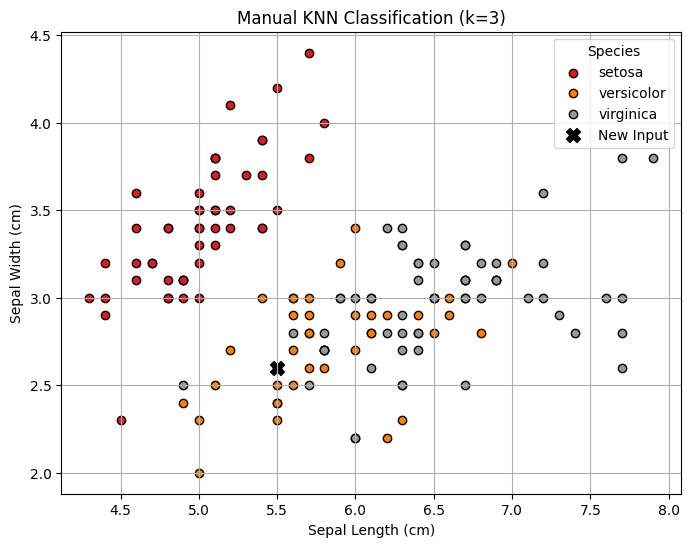

In [ ]:
# knn - Iris flower dataset

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Sem-6/ML/Lab4/iris.csv')

# Strip column names to avoid whitespace issues
df.columns = df.columns.str.strip()

# Rename to lowercase for consistency if needed
df.columns = df.columns.str.lower()

# Show column names for verification
# print(df.columns)

# Convert feature columns to numeric if not already
feature_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df[feature_columns] = df[feature_columns].apply(pd.to_numeric, errors='coerce')

# Drop missing values if any
df.dropna(inplace=True)

# Separate features and labels
X = df[feature_columns].values
y = df['species'].values

# For plotting (only first 2 features)
X_plot = X[:, :2]

# Split into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ---- USER INPUT SECTION ----
print("\nEnter values for a new data point:")
feature1 = float(input("Sepal Length (cm): "))
feature2 = float(input("Sepal Width (cm): "))
feature3 = float(input("Petal Length (cm): "))
feature4 = float(input("Petal Width (cm): "))

new_input = np.array([feature1, feature2, feature3, feature4])

# ---- MANUAL KNN IMPLEMENTATION ----
k = 3  # Number of neighbors

# Calculate Euclidean distances to all training points
distances = []
for i in range(len(X_train)):
    dist = np.sqrt(np.sum((X_train[i] - new_input) ** 2))
    distances.append((dist, y_train[i]))

# Sort by distance
sorted_neighbors = sorted(distances, key=lambda x: x[0])

# Pick k nearest neighbors
k_neighbors = sorted_neighbors[:k]

# Perform majority vote
k_labels = [label for _, label in k_neighbors]
predicted_label = Counter(k_labels).most_common(1)[0][0]

print(f"\n✅ Predicted Species: {predicted_label}")

# ---- PLOT DATA + NEW POINT (Only First Two Features) ----
plt.figure(figsize=(8, 6))
unique_classes = np.unique(y)
colors = plt.cm.get_cmap('Set1', len(unique_classes))

# Plot training data
for idx, cls in enumerate(unique_classes):
    plt.scatter(
        X_plot[y == cls, 0], X_plot[y == cls, 1],
        color=colors(idx),
        label=str(cls),
        edgecolors='k'
    )

# Plot the new input point
plt.scatter(feature1, feature2, color='black', marker='X', s=100, label='New Input')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Manual KNN Classification (k=3)')
plt.legend(title="Species")
plt.grid(True)
plt.show()



✅ Accuracy on test data (k=3): 0.94

Sample Predictions (first 10):
Actual: Benign, Predicted: Benign
Actual: Malignant, Predicted: Malignant
Actual: Benign, Predicted: Benign
Actual: Malignant, Predicted: Benign
Actual: Malignant, Predicted: Benign
Actual: Benign, Predicted: Benign
Actual: Malignant, Predicted: Malignant
Actual: Benign, Predicted: Benign
Actual: Malignant, Predicted: Malignant
Actual: Malignant, Predicted: Benign


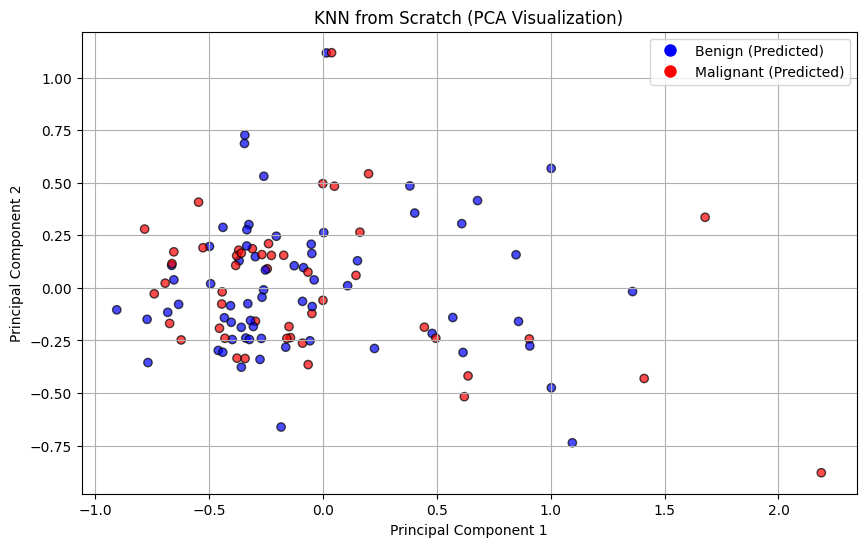

In [ ]:
# KNN - Breast Cancer Diagnosis dataset (from scratch without using built-in libraries,functions)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import random
from sklearn.decomposition import PCA

# -----------------------------
# Load dataset
# -----------------------------
file_path = "/content/drive/MyDrive/Sem-6/ML/Lab4/KNNAlgorithmDataset.csv"
df = pd.read_csv(file_path)
df.drop(columns=['id', 'Unnamed: 32'], inplace=True, errors='ignore')

# -----------------------------
# Set target and features
# -----------------------------
target_column = "diagnosis"
features = df.drop(columns=[target_column])
target = df[target_column]
target_encoded = target.map({'M': 1, 'B': 0}).values

# -----------------------------
# Normalize manually
# -----------------------------
def normalize(df):
    return (df - df.min()) / (df.max() - df.min())

X = normalize(features).values
y = target_encoded

# -----------------------------
# Manual train-test split (80/20)
# -----------------------------
combined = list(zip(X, y))
random.seed(42)
random.shuffle(combined)
split_index = int(0.8 * len(combined))
train = combined[:split_index]
test = combined[split_index:]

X_train = np.array([x for x, _ in train])
y_train = np.array([y for _, y in train])
X_test = np.array([x for x, _ in test])
y_test = np.array([y for _, y in test])

# -----------------------------
# Euclidean Distance
# -----------------------------
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# -----------------------------
# KNN Prediction
# -----------------------------
def knn_predict(x_test, X_train, y_train, k=3):
    distances = [(euclidean_distance(x_test, x), y) for x, y in zip(X_train, y_train)]
    distances.sort(key=lambda x: x[0])
    neighbors = distances[:k]
    labels = [label for _, label in neighbors]
    return Counter(labels).most_common(1)[0][0]

# -----------------------------
# Predict
# -----------------------------
k = 3
y_pred = [knn_predict(x, X_train, y_train, k) for x in X_test]

# -----------------------------
# Accuracy
# -----------------------------
accuracy = sum(p == a for p, a in zip(y_pred, y_test)) / len(y_test)
print(f"\n✅ Accuracy on test data (k={k}): {accuracy:.2f}")

# -----------------------------
# Sample Predictions
# -----------------------------
print("\nSample Predictions (first 10):")
for i in range(10):
    actual = "Malignant" if y_test[i] == 1 else "Benign"
    predicted = "Malignant" if y_pred[i] == 1 else "Benign"
    print(f"Actual: {actual}, Predicted: {predicted}")

# -----------------------------
# PCA Visualization
# -----------------------------
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Align test indices with reduced features
test_start = split_index
X_test_pca = X_reduced[test_start:]

# Plot the predictions
plt.figure(figsize=(10, 6))
colors = ['red' if label == 1 else 'blue' for label in y_pred]
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=colors, edgecolor='k', alpha=0.7)

plt.title("KNN from Scratch (PCA Visualization)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Benign (Predicted)', markerfacecolor='blue', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Malignant (Predicted)', markerfacecolor='red', markersize=10)
]
plt.legend(handles=legend_elements)
plt.grid(True)
plt.show()




✅ Accuracy using scikit-learn KNN (k=3): 0.96

Sample Predictions (first 10):
Actual: Benign, Predicted: Benign
Actual: Malignant, Predicted: Malignant
Actual: Malignant, Predicted: Malignant
Actual: Benign, Predicted: Benign
Actual: Benign, Predicted: Benign
Actual: Malignant, Predicted: Malignant
Actual: Malignant, Predicted: Malignant
Actual: Malignant, Predicted: Malignant
Actual: Benign, Predicted: Malignant
Actual: Benign, Predicted: Benign


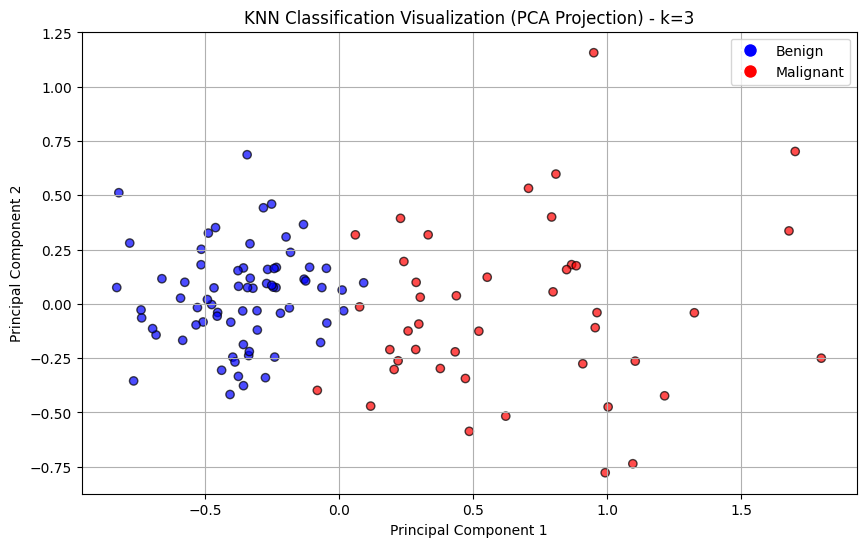

In [ ]:
# KNN - Breast Cancer Diagnosis dataset (using built-in libraries,functions)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

# -----------------------------
# Load dataset
# -----------------------------
df = pd.read_csv("/content/drive/MyDrive/Sem-6/ML/Lab4/KNNAlgorithmDataset.csv")
df.drop(columns=['id', 'Unnamed: 32'], inplace=True, errors='ignore')

# -----------------------------
# Features and Target
# -----------------------------
X = df.drop(columns=['diagnosis'])
y = df['diagnosis'].map({'M': 1, 'B': 0})  # M = Malignant, B = Benign

# -----------------------------
# Normalize features
# -----------------------------
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------
# Train-test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# -----------------------------
# KNN Classifier
# -----------------------------
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# -----------------------------
# Predictions and Accuracy
# -----------------------------
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Accuracy using scikit-learn KNN (k={k}): {accuracy:.2f}")

# -----------------------------
# Sample Predictions
# -----------------------------
print("\nSample Predictions (first 10):")
for i in range(10):
    actual = "Malignant" if y_test.iloc[i] == 1 else "Benign"
    predicted = "Malignant" if y_pred[i] == 1 else "Benign"
    print(f"Actual: {actual}, Predicted: {predicted}")

# -----------------------------
# PCA Visualization
# -----------------------------
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)
X_train_pca, X_test_pca = train_test_split(X_reduced, test_size=0.2, random_state=42)

plt.figure(figsize=(10, 6))
colors = ['blue' if label == 0 else 'red' for label in y_pred]
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=colors, edgecolor='k', alpha=0.7)
plt.title(f"KNN Classification Visualization (PCA Projection) - k={k}")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Benign', markerfacecolor='blue', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Malignant', markerfacecolor='red', markersize=10)
]
plt.legend(handles=legend_elements)
plt.grid(True)
plt.show()



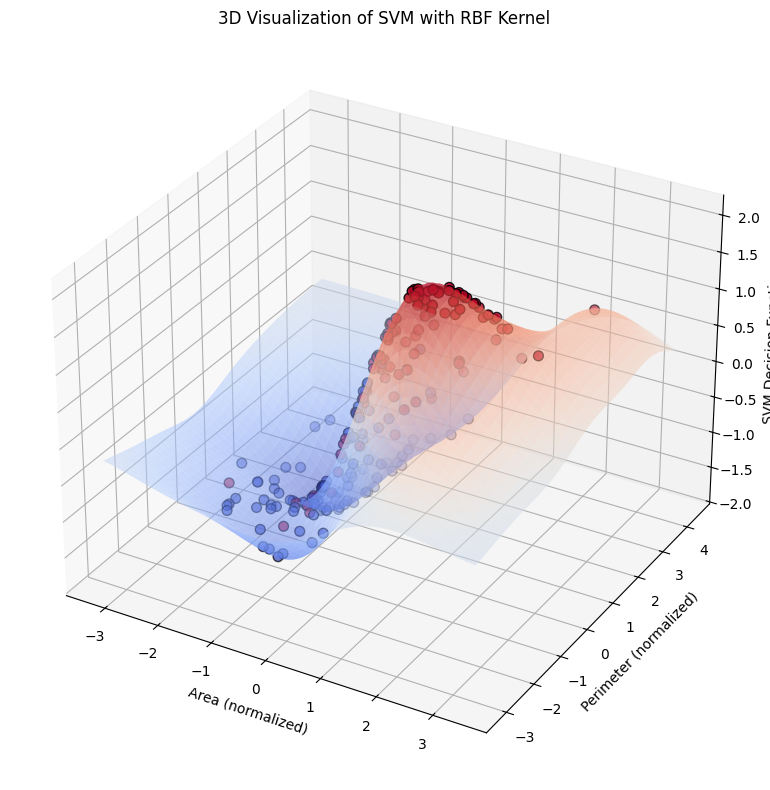

In [ ]:
# SVM - 1

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

# Assume X = [[Area, Perimeter], ...] and y = [class labels]
# Load your real data here
# Example data:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
X = StandardScaler().fit_transform(X)

# Train SVM with RBF kernel
clf = svm.SVC(kernel='rbf', C=1, gamma=0.5)
clf.fit(X, y)

# Create mesh grid
xx, yy = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1, 100),
                     np.linspace(X[:,1].min()-1, X[:,1].max()+1, 100))

# Compute the decision function value for each grid point
zz = np.array([clf.decision_function([[x, y]])[0] for x, y in zip(xx.ravel(), yy.ravel())])
zz = zz.reshape(xx.shape)

# Plot 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Surface
ax.plot_surface(xx, yy, zz, cmap='coolwarm', alpha=0.5, linewidth=0)

# Scatter the actual data points
z_vals = clf.decision_function(X)
ax.scatter(X[:, 0], X[:, 1], z_vals, c=y, cmap='coolwarm', edgecolors='k', s=50)

# Labels
ax.set_xlabel('Area (normalized)')
ax.set_ylabel('Perimeter (normalized)')
ax.set_zlabel('SVM Decision Function')
ax.set_title('3D Visualization of SVM with RBF Kernel')

plt.tight_layout()
plt.show()



--- Decision Function (f(x)) Equation ---
f(x) = Σ [αᵢ * exp(-γ * ||x - xᵢ||²)] + b
γ = 0.5
b = -0.1319

Support Vectors and αᵢ coefficients:
α[0] = -1.0000, x[0] = [-0.17089353 -0.47640495]
α[1] = -1.0000, x[1] = [-0.09326952 -1.41313063]
α[2] = -1.0000, x[2] = [-0.25695172  0.19649946]
α[3] = -0.2720, x[3] = [0.2497229  2.44247312]
α[4] = -0.9342, x[4] = [-2.24906671 -0.366065  ]
α[5] = -1.0000, x[5] = [ 0.23573561 -0.20536761]
α[6] = -0.8405, x[6] = [-1.75745228 -1.75730071]
α[7] = -1.0000, x[7] = [-0.02215076 -0.41177938]
α[8] = -1.0000, x[8] = [ 0.12067445 -0.75009319]
α[9] = -1.0000, x[9] = [-0.56644049 -0.51925829]
α[10] = -1.0000, x[10] = [0.15924095 0.07559578]
α[11] = -1.0000, x[11] = [ 0.20173244 -1.03304332]
α[12] = -1.0000, x[12] = [-0.39884163 -0.89532482]
α[13] = -1.0000, x[13] = [ 0.28690702 -0.9604253 ]
α[14] = -0.8777, x[14] = [-1.75503621 -1.47015833]
α[15] = -1.0000, x[15] = [-0.23261626  0.1251546 ]
α[16] = -1.0000, x[16] = [ 0.0354817  -1.77092969]
α[17] = -1.000

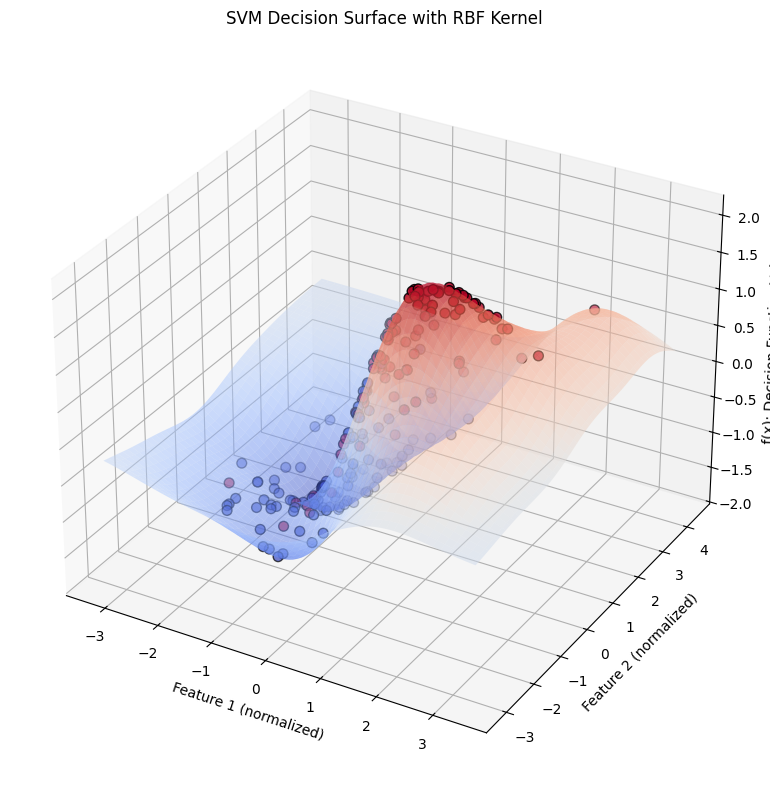

In [ ]:
# SVM - 2

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

# Generate and normalize example data
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, random_state=42)
X = StandardScaler().fit_transform(X)

# Train SVM with RBF kernel
gamma = 0.5
clf = svm.SVC(kernel='rbf', C=1, gamma=gamma)
clf.fit(X, y)

# Extract model parameters
support_vectors = clf.support_vectors_
dual_coefs = clf.dual_coef_[0]  # Shape: (n_support_vectors,)
intercept = clf.intercept_[0]

# Print out the actual decision function equation
print("\n--- Decision Function (f(x)) Equation ---")
print("f(x) = Σ [αᵢ * exp(-γ * ||x - xᵢ||²)] + b")
print(f"γ = {gamma}")
print(f"b = {intercept:.4f}")
print("\nSupport Vectors and αᵢ coefficients:")

for i, (alpha, vec) in enumerate(zip(dual_coefs, support_vectors)):
    print(f"α[{i}] = {alpha:.4f}, x[{i}] = {vec}")

# Create mesh grid
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))

# Compute decision function for each point
def decision_function_rbf(x1, x2):
    z = np.zeros_like(x1)
    for alpha, sv in zip(dual_coefs, support_vectors):
        z += alpha * np.exp(-gamma * ((x1 - sv[0]) ** 2 + (x2 - sv[1]) ** 2))
    return z + intercept

zz = decision_function_rbf(xx, yy)

# Plot 3D surface
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, zz, cmap='coolwarm', alpha=0.5, linewidth=0)

# Actual points
z_vals = clf.decision_function(X)
ax.scatter(X[:, 0], X[:, 1], z_vals, c=y, cmap='coolwarm', edgecolors='k', s=50)

# Labels
ax.set_xlabel('Feature 1 (normalized)')
ax.set_ylabel('Feature 2 (normalized)')
ax.set_zlabel('f(x): Decision Function Value')
ax.set_title('SVM Decision Surface with RBF Kernel')

plt.tight_layout()
plt.show()



✅ SVM Accuracy: 0.98

Classification Report:
               precision    recall  f1-score   support

      Benign       0.97      1.00      0.99        71
   Malignant       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Sample Predictions (first 10):
Actual: Benign, Predicted: Benign
Actual: Malignant, Predicted: Malignant
Actual: Malignant, Predicted: Malignant
Actual: Benign, Predicted: Benign
Actual: Benign, Predicted: Benign
Actual: Malignant, Predicted: Malignant
Actual: Malignant, Predicted: Malignant
Actual: Malignant, Predicted: Malignant
Actual: Benign, Predicted: Benign
Actual: Benign, Predicted: Benign


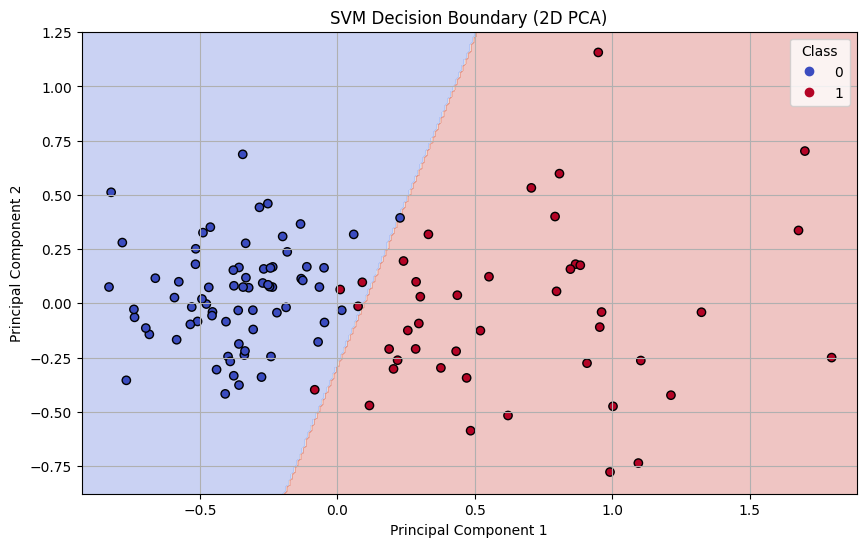

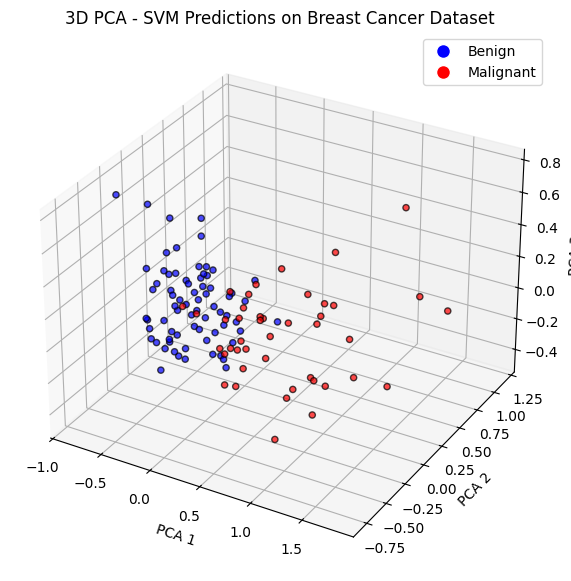

In [ ]:
#  SVM - Breast Cancer Diagnosis dataset (using built-in functions,libraries)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
from matplotlib.lines import Line2D

# -----------------------------
# Load dataset
# -----------------------------
df = pd.read_csv("/content/drive/MyDrive/Sem-6/ML/Lab4/KNNAlgorithmDataset.csv")
df.drop(columns=['id', 'Unnamed: 32'], inplace=True, errors='ignore')

# -----------------------------
# Set features and target
# -----------------------------
X = df.drop(columns=['diagnosis'])
y = df['diagnosis'].map({'M': 1, 'B': 0})  # Malignant = 1, Benign = 0

# -----------------------------
# Normalize features
# -----------------------------
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------
# Train-test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# -----------------------------
# SVM Classifier
# -----------------------------
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)

# -----------------------------
# Predictions and Evaluation
# -----------------------------
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ SVM Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["Benign", "Malignant"]))

# -----------------------------
# Sample Predictions
# -----------------------------
print("\nSample Predictions (first 10):")
for i in range(10):
    actual = "Malignant" if y_test.iloc[i] == 1 else "Benign"
    predicted = "Malignant" if y_pred[i] == 1 else "Benign"
    print(f"Actual: {actual}, Predicted: {predicted}")

# -----------------------------
# PCA for 2D Visualization
# -----------------------------
pca_2d = PCA(n_components=2)
X_reduced_2d = pca_2d.fit_transform(X_scaled)
X_train_2d, X_test_2d = train_test_split(X_reduced_2d, test_size=0.2, random_state=42)

# Retrain SVM on PCA-reduced data
svm_vis = SVC(kernel='linear', C=1.0)
svm_vis.fit(X_train_2d, y_train)

# Plot 2D decision boundary
def plot_pca_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend(*scatter.legend_elements(), title="Class")
    plt.grid(True)
    plt.show()

plot_pca_decision_boundary(X_test_2d, y_test, svm_vis, "SVM Decision Boundary (2D PCA)")

# -----------------------------
# PCA for 3D Visualization
# -----------------------------
pca_3d = PCA(n_components=3)
X_reduced_3d = pca_3d.fit_transform(X_scaled)
X_train_3d, X_test_3d = train_test_split(X_reduced_3d, test_size=0.2, random_state=42)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
colors = ['blue' if label == 0 else 'red' for label in y_test]

ax.scatter(X_test_3d[:, 0], X_test_3d[:, 1], X_test_3d[:, 2], c=colors, edgecolor='k', alpha=0.7)
ax.set_title("3D PCA - SVM Predictions on Breast Cancer Dataset")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")

# Legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Benign', markerfacecolor='blue', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Malignant', markerfacecolor='red', markersize=10)
]
ax.legend(handles=legend_elements)
plt.show()



✅ SVM Accuracy: 1.00


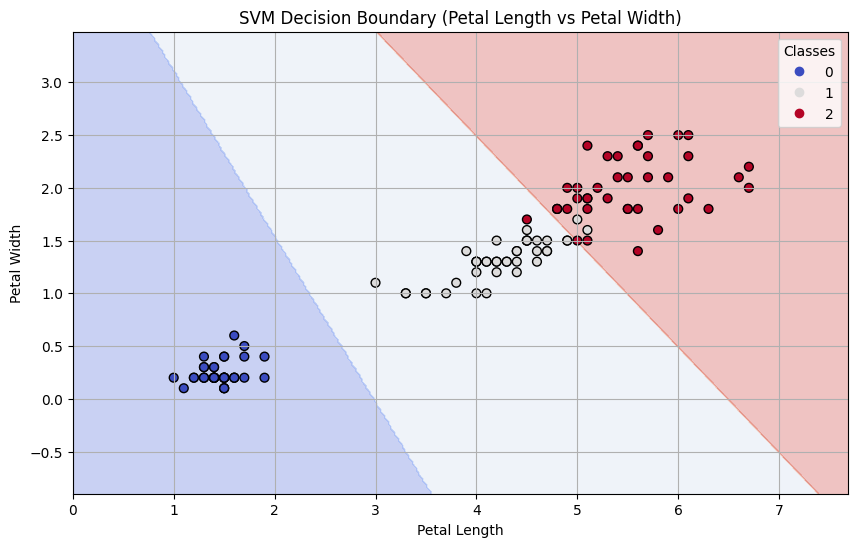

In [ ]:
# SVM - Iris dataset ( using built-in function, libraries)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# -------------------------------
# Load and prepare the dataset
# -------------------------------
iris = pd.read_csv("/content/drive/MyDrive/Sem-6/ML/Lab4/iris.csv")

# Select only 2 features for visualization
X = iris[['petal_length', 'petal_width']].values
y = iris['species'].values

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# -------------------------------
# Train the SVM model
# -------------------------------
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# -------------------------------
# Make predictions and evaluate
# -------------------------------
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ SVM Accuracy: {accuracy:.2f}")

# -------------------------------
# Plot decision boundary
# -------------------------------
def plot_decision_boundary(X, y, model, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('Petal Length')
    plt.ylabel('Petal Width')
    plt.title(title)
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.grid(True)
    plt.show()

plot_decision_boundary(X_train, y_train, svm_model, "SVM Decision Boundary (Petal Length vs Petal Width)")



✅ Accuracy (SVM from Scratch): 0.23

Sample Predictions (first 10):
Actual: Benign, Predicted: Malignant
Actual: Benign, Predicted: Malignant
Actual: Benign, Predicted: Malignant
Actual: Benign, Predicted: Malignant
Actual: Benign, Predicted: Malignant
Actual: Malignant, Predicted: Malignant
Actual: Malignant, Predicted: Malignant
Actual: Benign, Predicted: Malignant
Actual: Benign, Predicted: Malignant
Actual: Benign, Predicted: Malignant


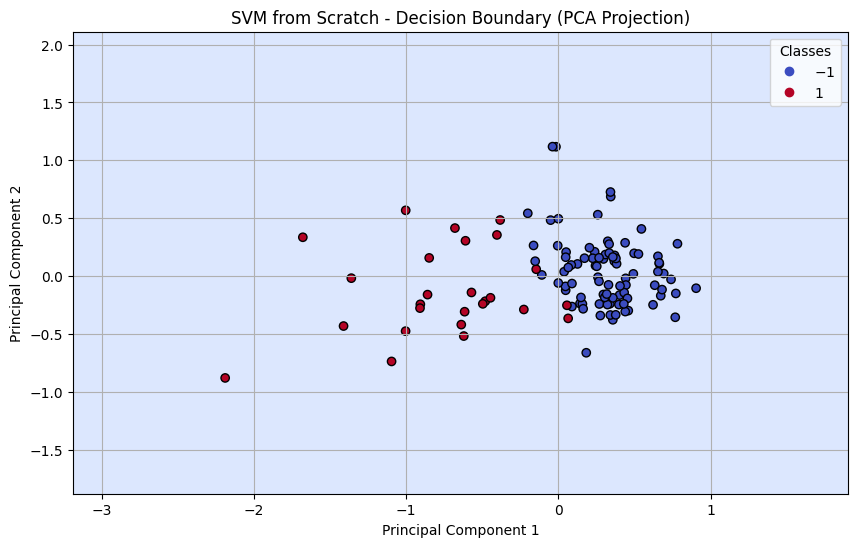

In [ ]:
#  SVM - Breast Cancer Diagnosis dataset (from scratch without using built-in functions,libraries)
#  uses gradient descent and hinge loss, without using scikit-learn’s SVC.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Load and Prepare the Dataset
# -----------------------------
df = pd.read_csv("/content/drive/MyDrive/Sem-6/ML/Lab4/KNNAlgorithmDataset.csv")
df.drop(columns=['id', 'Unnamed: 32'], inplace=True, errors='ignore')
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': -1})

X = df.drop(columns=['diagnosis']).values
y = df['diagnosis'].values

# Normalize manually
X = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

# -----------------------------
# Reduce to 2D using PCA for plotting
# -----------------------------
mean = np.mean(X, axis=0)
X_centered = X - mean
cov_matrix = np.cov(X_centered.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
top_2_components = eigenvectors[:, :2]
X_reduced = np.dot(X_centered, top_2_components)

# -----------------------------
# Train-test split
# -----------------------------
split_idx = int(0.8 * len(X_reduced))
X_train, X_test = X_reduced[:split_idx], X_reduced[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# -----------------------------
# SVM Class
# -----------------------------
class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.w) + self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y[idx]))
                    self.b -= self.lr * y[idx]

    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)

# -----------------------------
# Train and Predict
# -----------------------------
model = SVM()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# -----------------------------
# Accuracy
# -----------------------------
accuracy = np.mean(y_pred == y_test)
print(f"\n✅ Accuracy (SVM from Scratch): {accuracy:.2f}")

# -----------------------------
# Sample Predictions (first 10)
# -----------------------------
print("\nSample Predictions (first 10):")
for i in range(10):
    actual = "Malignant" if y_test[i] == 1 else "Benign"
    predicted = "Malignant" if y_pred[i] == 1 else "Benign"
    print(f"Actual: {actual}, Predicted: {predicted}")

# -----------------------------
# Decision Boundary Plot
# -----------------------------
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.01

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title("SVM from Scratch - Decision Boundary (PCA Projection)")
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.grid(True)
    plt.show()

plot_decision_boundary(X_test, y_test, model)


